<a href="https://colab.research.google.com/github/sravanjosh07/Self_Driving_cars-Udemy/blob/Schnee/RoadSignClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs/src/master/


Cloning into 'master'...
Unpacking objects: 100% (6/6), done.


In [ ]:
!ls master

signnames.csv  test.p  train.p	valid.p


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd
import random

In [ ]:
np.random.seed(100)

In [ ]:
with open('master/train.p', 'rb') as f:
  train_data = pickle.load(f)
with open('master/valid.p', 'rb') as f:
  val_data = pickle.load(f)
with open('master/test.p', 'rb') as f:
  test_data = pickle.load(f)



In [ ]:
X_train, y_train = train_data['features'], train_data['labels']
X_test, y_test = test_data['features'], test_data['labels']
X_val, y_val = val_data['features'], val_data['labels']

In [ ]:
print(X_test.shape)
print(X_train.shape)
print(X_val.shape)

(12630, 32, 32, 3)
(34799, 32, 32, 3)
(4410, 32, 32, 3)


In [ ]:
sign_data = pd.read_csv('master/signnames.csv')


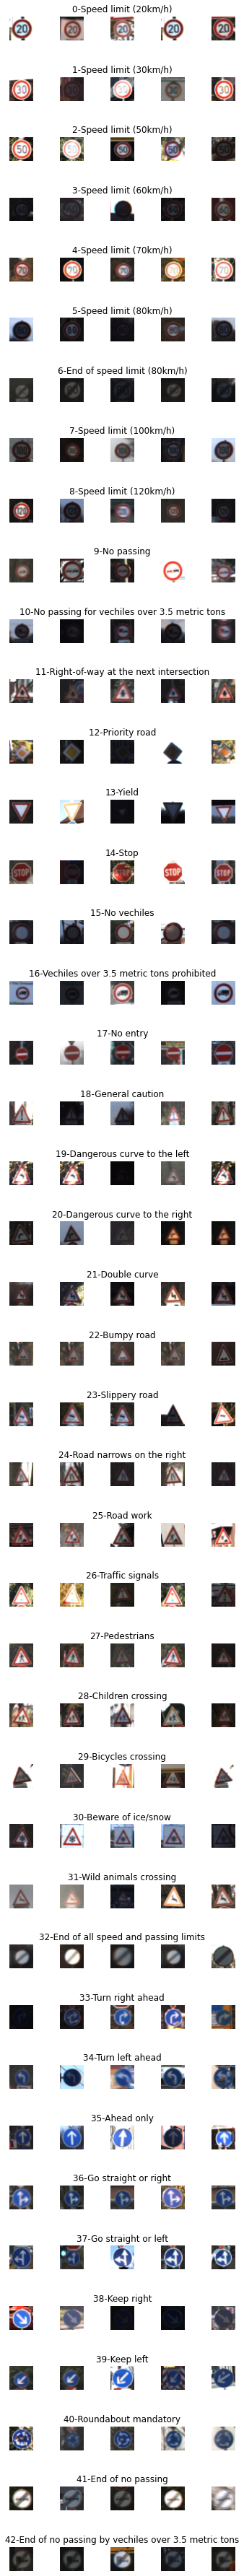

In [ ]:
num_of_samples = []
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))
fig.tight_layout()
for i in range(cols):
    for j, row in sign_data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[np.random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + "-" + row["SignName"])
            num_of_samples.append(len(x_selected))




[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

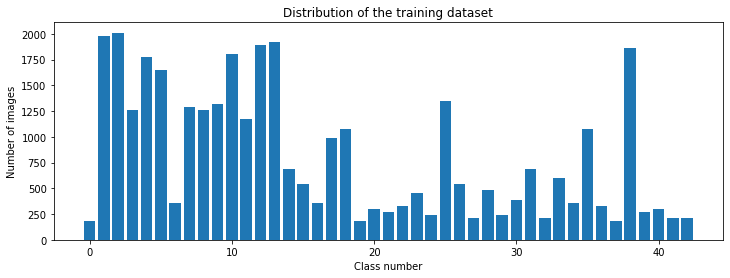

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images") 

(32, 32, 3)
41
(32, 32, 3)


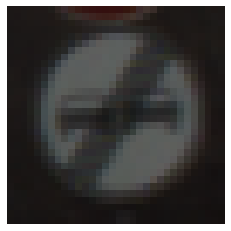

In [ ]:
import cv2
plt.imshow(X_train[26])
plt.axis("OFF")
print(X_train[26].shape)
print(y_train[26])
print(X_train[26].shape)

(32, 32)


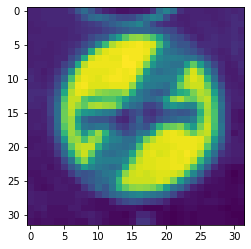

In [ ]:
 def conv2gray(img):
   img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
   return img
img = conv2gray(X_train[26])
plt.imshow(img)
print(img.shape)

(32, 32)


(-0.5, 31.5, 31.5, -0.5)

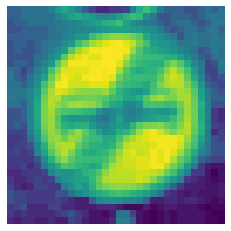

In [ ]:
 def equalize(img):
   img = cv2.equalizeHist(img)
   return img

img = equalize(img)
plt.imshow(img)
print(img.shape)
plt.axis("off")


In [ ]:
def preprocessing(img):
  img = conv2gray(img)
  img = equalize(img)
  img = img/255
  return img

In [ ]:
X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))

(34799, 32, 32)


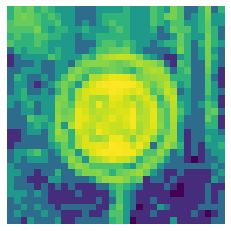

In [ ]:
plt.imshow(X_train[np.random.randint(0, len(X_train)-1)])
plt.axis("off")
print(X_train.shape)

In [ ]:
X_train = X_train.reshape(34799,32,32,1)
X_test = X_test.reshape(12630,32,32,1)
X_val = X_val.reshape(4410,32,32,1)

In [ ]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

In [ ]:
def modified_model():
  model = Sequential()
  model.add(Conv2D(70, (5,5), activation= 'relu', input_shape = (32,32,1)))
  model.add(Conv2D(70, (5,5), activation= 'relu', input_shape = (32,32,1)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  
  model.add(Conv2D(35, kernel_size=(3,3), activation= 'relu'))
  model.add(Conv2D(35, kernel_size=(3,3), activation= 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.51))

  model.add(Flatten())
  model.add(Dense(500, activation= 'relu' ))
  model.add(Dropout(0.55))
  
  model.add(Dense(43, activation= 'softmax'))
  model.compile(Adam(lr = 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])
  return model


In [ ]:
model = modified_model()
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 70)        1820      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 24, 24, 70)        122570    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 70)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 10, 10, 35)        22085     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 8, 8, 35)          11060     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 4, 4, 35)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 4, 4, 35)         

In [ ]:
 history = model.fit(X_train, y_train, epochs= 10, validation_data= (X_val, y_val), batch_size= 400, verbose= 1, shuffle= 1)

Epoch 1/10
87/87 [==============================] - 4s 39ms/step - loss: 3.2420 - accuracy: 0.1504 - val_loss: 0.7614 - val_accuracy: 0.8005
Epoch 2/10
87/87 [==============================] - 3s 37ms/step - loss: 0.8854 - accuracy: 0.7284 - val_loss: 0.2865 - val_accuracy: 0.9152
Epoch 3/10
87/87 [==============================] - 3s 37ms/step - loss: 0.4494 - accuracy: 0.8605 - val_loss: 0.1934 - val_accuracy: 0.9458
Epoch 4/10
87/87 [==============================] - 3s 38ms/step - loss: 0.3157 - accuracy: 0.8997 - val_loss: 0.1512 - val_accuracy: 0.9590
Epoch 5/10
87/87 [==============================] - 3s 38ms/step - loss: 0.2339 - accuracy: 0.9279 - val_loss: 0.1243 - val_accuracy: 0.9612
Epoch 6/10
87/87 [==============================] - 3s 38ms/step - loss: 0.2033 - accuracy: 0.9375 - val_loss: 0.1156 - val_accuracy: 0.9680
Epoch 7/10
87/87 [==============================] - 3s 38ms/step - loss: 0.1676 - accuracy: 0.9457 - val_loss: 0.0994 - val_accuracy: 0.9705
Epoch 8/10
87

Text(0.5, 0, 'epoch')

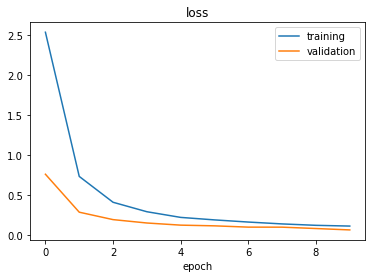

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

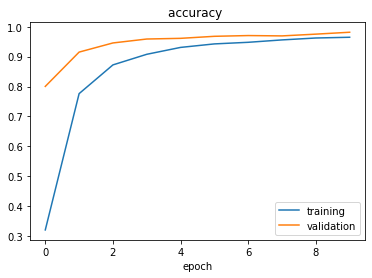

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('accuracy ')
plt.xlabel('epoch')

In [ ]:
 score = model.evaluate(X_test, y_test, verbose=0)
 print('test score :', score[0])
 print('test accuracy :', score[1])

test score : 0.13209588825702667
test accuracy : 0.963341236114502


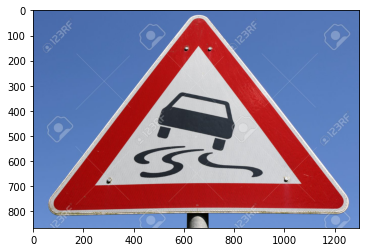

In [ ]:
import requests
from PIL import Image
url = 'https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
 

  

(32, 32)


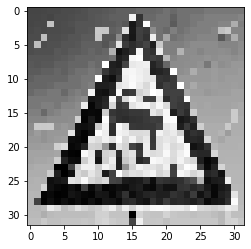

In [ ]:
#Preprocess image
 
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [ ]:

#Reshape reshape
 
img = img.reshape(1, 32, 32, 1)
 
#Test image
print("predicted sign: "+ str(model.predict_classes(img)))

predicted sign: [23]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
import numpy as np


In [ ]:
def PickANum(a,b):
  num = np.random.randint(a,b)
  np.random.seed(1)
  print(num)


In [ ]:
PickANum(1,50)


45


TypeError: ignored